# 1. Dropping Columns in a DataFrame

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('BL-Flickr-Images-Book.csv')

In [3]:
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


##  Let's delete some categories are not important to us. Retaining these unneeded categories will take up unnecessary space and potentially also bog down runtime.

In [4]:
to_drop=['Edition Statement','Corporate Author','Corporate Contributors','Former owner','Engraver','Contributors','Issuance type','Shelfmarks']

In [5]:
df.drop(to_drop, inplace=True, axis=1)

In [6]:
df.columns

Index(['Identifier', 'Place of Publication', 'Date of Publication',
       'Publisher', 'Title', 'Author', 'Flickr URL'],
      dtype='object')

## It can be expected that when a librarian searches for a record, they may input the unique identifier (values in the Identifier column) for a book

In [7]:
df.Identifier.is_unique

True

In [8]:
df = df.set_index('Identifier')

In [9]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [70]:
#Trying it out with 206 as identifier
df.loc[206]

Place of Publication                                               London
Date of Publication                                                  1879
Publisher                                                S. Tinsley & Co.
Title                                   Walter Forbes. [A novel.] By A. A
Author                                                              A. A.
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 206, dtype: object

In [16]:
import missingno as msno

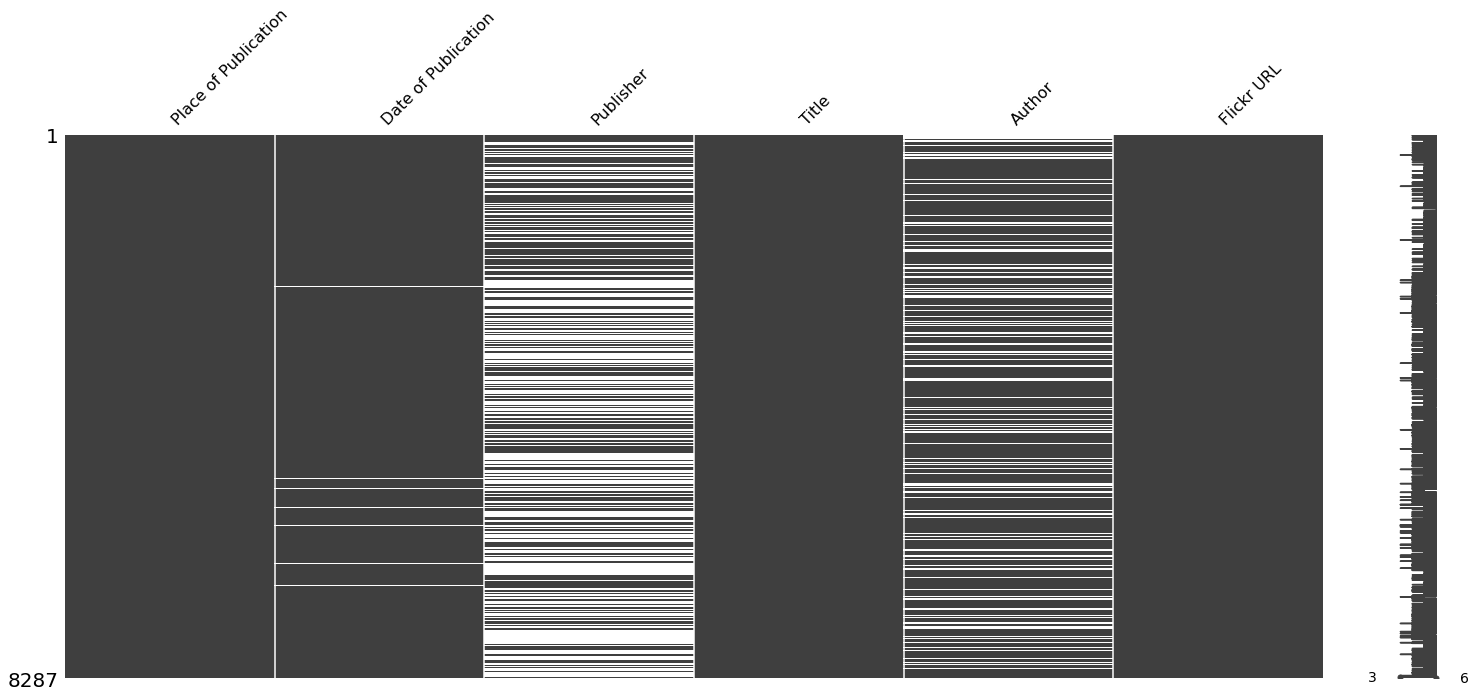

In [17]:
#Check for missing numbers as matrix
msno.matrix(df)

In [20]:
# Check the number of null values in each column
df.isnull().sum()

Place of Publication       0
Date of Publication      181
Publisher               4195
Title                      0
Author                  1778
Flickr URL                 0
dtype: int64

## Let's clean up "Date of Publication" column by using a regular expression to extract any four digits at the beginning of a string

In [23]:
extr = df['Date of Publication'].str.extract(r'^(\d{4})', expand=False)
extr.head()

Identifier
206    1879
216    1868
218    1869
472    1851
480    1857
Name: Date of Publication, dtype: object

## This column still has object dtype, but we can easily get its numerical version with pd.to_numeric

In [26]:
df['Date of Publication'] = pd.to_numeric(extr)
df['Date of Publication'].dtype

dtype('float64')

In [29]:
df['Place of Publication'].head(10)

Identifier
206                                  London
216                London; Virtue & Yorston
218                                  London
472                                  London
480                                  London
481                                  London
519                                  London
667     pp. 40. G. Bryan & Co: Oxford, 1898
874                                 London]
1143                                 London
Name: Place of Publication, dtype: object

## Let’s take a look at two specific entries

In [30]:
df.loc[4157862]

Place of Publication                                  Newcastle-upon-Tyne
Date of Publication                                                  1867
Publisher                                                      T. Fordyce
Title                   Local Records; or, Historical Register of rema...
Author                      FORDYCE, T. - Printer, of Newcastle-upon-Tyne
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 4157862, dtype: object

In [32]:
df.loc[4159587]

Place of Publication                                  Newcastle upon Tyne
Date of Publication                                                  1834
Publisher                                                Mackenzie & Dent
Title                   An historical, topographical and descriptive v...
Author                                              Mackenzie, E. (Eneas)
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 4159587, dtype: object

## These two books were published in the same place, but one has hyphens in the name of the place while the other does not.

## To clean this column in one sweep, we can use str.contains() to get a Boolean mask.

In [35]:
pub = df['Place of Publication']
london = pub.str.contains('London')
london[:5]

Identifier
206    True
216    True
218    True
472    True
480    True
Name: Place of Publication, dtype: bool

In [36]:
oxford = pub.str.contains('Oxford')

## Combine them with np.where:

In [39]:
df['Place of Publication'] = np.where(london, 'London',
                                      np.where(oxford, 'Oxford',
                                               pub.str.replace('-', ' ')))
df['Place of Publication'].head()

Identifier
206    London
216    London
218    London
472    London
480    London
Name: Place of Publication, dtype: object

## Let's cross-check the record that had dashes in the Place of Publication

In [40]:
df.loc[4157862]

Place of Publication                                  Newcastle upon Tyne
Date of Publication                                                  1867
Publisher                                                      T. Fordyce
Title                   Local Records; or, Historical Register of rema...
Author                      FORDYCE, T. - Printer, of Newcastle-upon-Tyne
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 4157862, dtype: object

## Let’s have a look at the first five entries, which look a lot crisper than when we started out

In [42]:
df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
206,London,1879.0,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
216,London,1868.0,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
218,London,1869.0,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
472,London,1851.0,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
480,London,1857.0,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [71]:
df.isnull().sum()

Place of Publication       0
Date of Publication      971
Publisher               4195
Title                      0
Author                  1778
Flickr URL                 0
dtype: int64

## Let's inspect the Date of Publication column where its records are null

In [78]:
df[pd.isnull(df['Date of Publication'])]

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
Identifier,,,,,,
667,Oxford,NaN,NaN,"The Coming of Spring, and other poems. By J. A...","A., J.|A., J.",http://www.flickr.com/photos/britishlibrary/ta...
5385,London,NaN,"Bradbury, Agnew & Co.",[The comic history of England ... With twenty ...,"A'BECKETT, Gilbert Abbott.",http://www.flickr.com/photos/britishlibrary/ta...
5389,London,NaN,"Bradbury, Agnew & Co.",[The Comic History of Rome ... Illustrated by ...,"A'BECKETT, Gilbert Abbott.",http://www.flickr.com/photos/britishlibrary/ta...
11361,Leipzig,NaN,NaN,"Tirol und Vorarlberg ... Mit ... einer Karte, ...","ACHLEITNER, Arthur - and UBL (E.)",http://www.flickr.com/photos/britishlibrary/ta...
11852,"pp. 40. W. Cann: Plymouth, [1876?]",NaN,NaN,"A Question of Holy Writ, suggested by a lectur...","ACKLAND - Lieut., R.N",http://www.flickr.com/photos/britishlibrary/ta...
...,...,...,...,...,...,...
4113816,London,NaN,NaN,The lacemakers: sketches of Irish characters w...,"MEREDITH, Susanna.|WIBERG, Carl Fredrik.",http://www.flickr.com/photos/britishlibrary/ta...
4114334,London,NaN,NaN,"The Sword of Peace; or, a voyage of love; a co...",NaN,http://www.flickr.com/photos/britishlibrary/ta...
4114889,London,NaN,NaN,"The 5 Alls. A collection of stories, charades,...",NaN,http://www.flickr.com/photos/britishlibrary/ta...


## We still have null values in the dataframe. We can either drop them or turn them to unknown. I don't think it would be wise replacing them with a computed value as it can lead to inaccurate insights of what actually happened.

## Let's just replace null values with unknown

In [81]:
df = df.fillna('unknown')

In [82]:
df.isnull().sum()

Place of Publication    0
Date of Publication     0
Publisher               0
Title                   0
Author                  0
Flickr URL              0
dtype: int64

# 2. Cleaning the University_Towns Dataset Using the applymap Function

## In certain situations, you will see that the “dirt” is not localized to one column but is more spread out. Hence, it would be helpful to apply a customized function to each cell or element of a DataFrame.

In [58]:
university_towns = []
with open('university_towns.txt') as file:
    for line in file:
         if '[edit]' in line:
             # Remember this `state` until the next is found
             state = line
         else:
             # Otherwise, we have a city; keep `state` as last-seen
             university_towns.append((state, line))

university_towns[:5]

[('Alabama[edit]\n', 'Auburn (Auburn University)[1]\n'),
 ('Alabama[edit]\n', 'Florence (University of North Alabama)\n'),
 ('Alabama[edit]\n', 'Jacksonville (Jacksonville State University)[2]\n'),
 ('Alabama[edit]\n', 'Livingston (University of West Alabama)[2]\n'),
 ('Alabama[edit]\n', 'Montevallo (University of Montevallo)[2]\n')]

## We can wrap this list in a DataFrame and set the columns as “State” and “RegionName”.

In [59]:
towns_df = pd.DataFrame(university_towns,
                        columns=['State', 'RegionName'])

towns_df.head()

,State,RegionName
0,Alabama[edit]\n,Auburn (Auburn University)[1]\n
1,Alabama[edit]\n,Florence (University of North Alabama)\n
2,Alabama[edit]\n,Jacksonville (Jacksonville State University)[2]\n
3,Alabama[edit]\n,Livingston (University of West Alabama)[2]\n
4,Alabama[edit]\n,Montevallo (University of Montevallo)[2]\n


## Let’s define the function that will be used by applymap()

In [60]:
def get_citystate(item):
    if ' (' in item:
        return item[:item.find(' (')]
    elif '[' in item:
        return item[:item.find('[')]
    else:
        return item

In [61]:
towns_df =  towns_df.applymap(get_citystate)

In [62]:
towns_df.head()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo


# 3. Renaming Columns and Skipping Rows

In [63]:
df2 = pd.read_csv('olympics.csv')
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,? Summer,01 !,02 !,03 !,Total,? Winter,01 !,02 !,03 !,Total,? Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


## We notice that the first row should be our header, NaN above should really be something like “Country”, ? Summer is supposed to represent “Summer Games”, 01 ! should be “Gold”, and so on.

In [64]:
df2 = pd.read_csv('olympics.csv', header=1)
df2.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


## Let's define a dictionary that maps current column names (as keys) to more usable ones (the dictionary’s values):

In [66]:
new_names = {'Unnamed: 0': 'Country',
...               '? Summer': 'Summer Olympics',
...               '01 !': 'Gold',
...               '02 !': 'Silver',
...               '03 !': 'Bronze',
...               '? Winter': 'Winter Olympics',
...               '01 !.1': 'Gold.1',
...               '02 !.1': 'Silver.1',
...               '03 !.1': 'Bronze.1',
...               '? Games': '# Games',
...               '01 !.2': 'Gold.2',
...               '02 !.2': 'Silver.2',
...               '03 !.2': 'Bronze.2'}

In [67]:
df2.rename(columns=new_names, inplace=True)

In [68]:
df2.head()

,Country,Summer Olympics,Gold,Silver,Bronze,Total,Winter Olympics,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [69]:
df2.isnull().sum()

Country            0
Summer Olympics    0
Gold               0
Silver             0
Bronze             0
Total              0
Winter Olympics    0
Gold.1             0
Silver.1           0
Bronze.1           0
Total.1            0
# Games            0
Gold.2             0
Silver.2           0
Bronze.2           0
Combined total     0
dtype: int64